# ENTREGA

In [43]:
import pandas as pd
import bnlearn as bn
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [44]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

df.shape

(142193, 23)

In [45]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

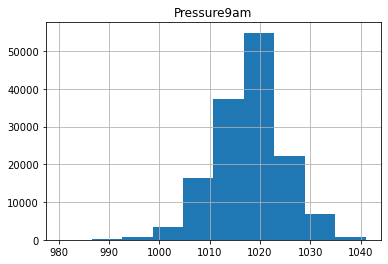

In [46]:
df.hist('Pressure9am')
plt.savefig('Pressure9am.jpg')

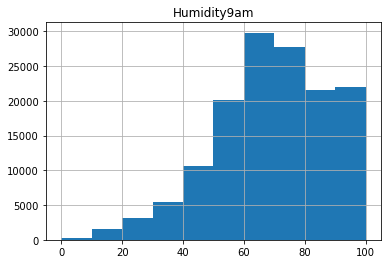

In [47]:
df.hist('Humidity9am')
plt.savefig('Humidity9am.jpg')

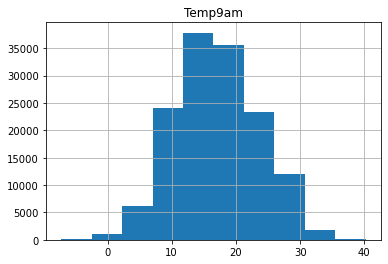

In [48]:
df.hist('Temp9am')
plt.savefig('Temp9am.jpg')

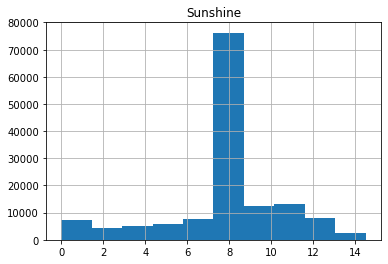

In [49]:
df.hist('Sunshine')
plt.savefig('Sunshine.jpg')

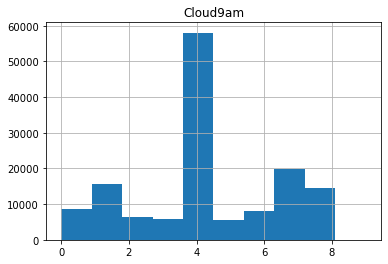

In [50]:
df.hist('Cloud9am')
plt.savefig('Cloud9am.jpg')

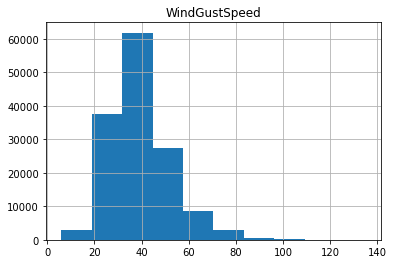

In [51]:
df.hist('WindGustSpeed')
plt.savefig('WindGustSpeed.jpg')

In [52]:
# Create bands for variables that we want to use in the model
df['Humidity9am']=df['Humidity9am'].apply(lambda x: 0 if x<70 else 1)
df['Sunshine']=df['Sunshine'].apply(lambda x: 0 if x<=7 else 1)
df['RainToday']=df['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
df['Temp9am']=df['Temp9am'].apply(lambda x: 0 if x <= 15 else 1)
df['Cloud9am']=df['Temp3pm'].apply(lambda x: 0 if x <= 4 else 1)
df['Pressure9am']=df['Pressure9am'].apply(lambda x: 0 if x <= 1013 else 1)
df['WindGustSpeed']=df['WindGustSpeed'].apply(lambda x: 0 if x <= 30 else 1 if 30 < x <= 50 else 2)

In [53]:
print(min(df['Temp9am']))
print(max(df['Temp9am']))

0
1


In [54]:
print(df['RainTomorrow'].unique())

['No' 'Yes']


In [55]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,1,W,1,W,WNW,20.0,24.0,1,22.0,0,1007.1,1,4.503167,1,21.8,0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,1,WNW,1,NNW,WSW,4.0,22.0,0,25.0,0,1007.8,1,4.503167,1,24.3,0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,1,WSW,1,W,WSW,19.0,26.0,0,30.0,0,1008.7,1,2.000000,1,23.2,0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,1,NE,0,SE,E,11.0,9.0,0,16.0,1,1012.8,1,4.503167,1,26.5,0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,1,W,1,ENE,NW,7.0,20.0,1,33.0,0,1006.0,1,8.000000,1,29.7,0,No


In [56]:
df_bn = df[['Humidity9am','Sunshine','RainToday','Temp9am','Cloud9am','Pressure9am','WindGustSpeed']]

In [57]:
df_bn.head()

,Humidity9am,Sunshine,RainToday,Temp9am,Cloud9am,Pressure9am,WindGustSpeed
0,1,1,0,1,1,0,1
1,0,1,0,1,1,0,1
2,0,1,0,1,1,0,1
3,0,1,0,1,1,1,0
4,1,1,0,1,1,0,1


In [58]:
df_bn.shape

(142193, 7)

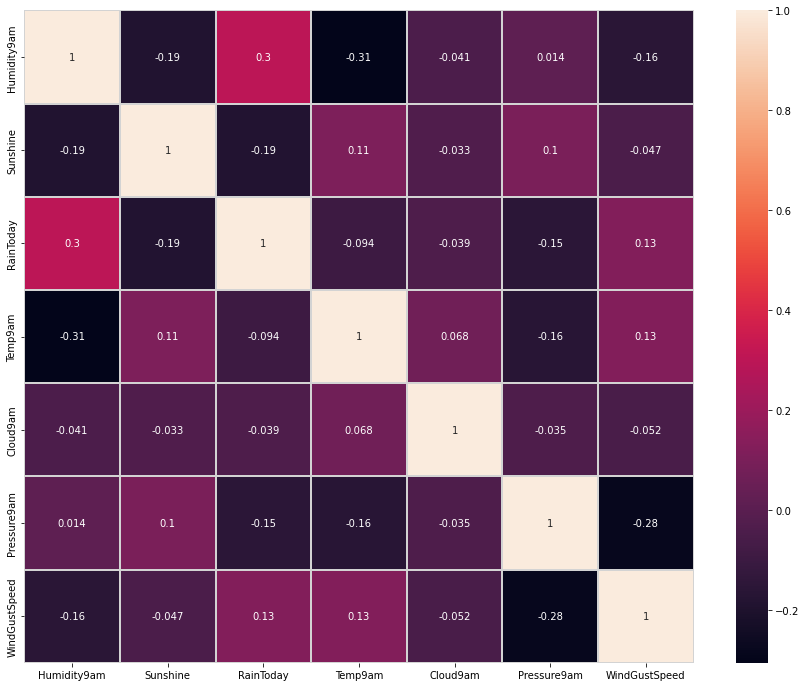

In [59]:
# heatmap of data
import seaborn as sns
plt.figure(figsize = (15, 12))

sns.heatmap(df_bn.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.savefig('corr.png')
plt.show()

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn]> Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


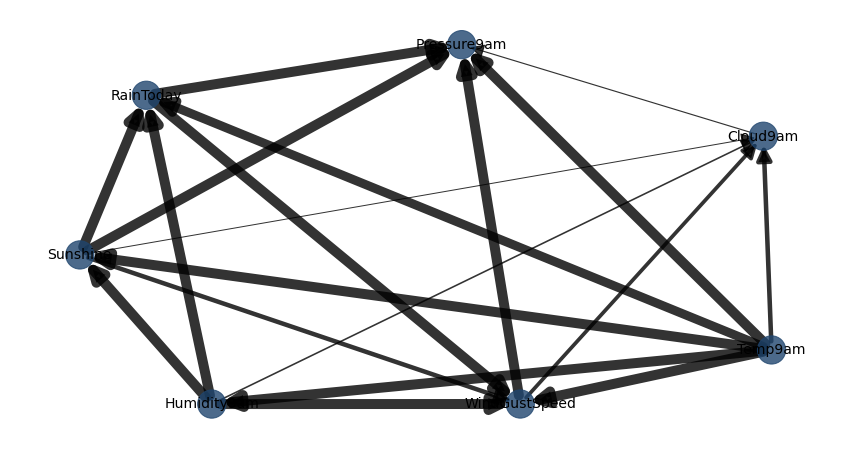

In [60]:
model = bn.structure_learning.fit(df_bn, methodtype='hc', scoretype='bic')
# Compute edge strength with the chi_square test statistic
model = bn.independence_test(model, df_bn, prune=True)
G = bn.plot(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of Humidity9am:
+----------------+--------------------+--------------------+
| Temp9am        | Temp9am(0)         | Temp9am(1)         |
+----------------+--------------------+--------------------+
| Humidity9am(0) | 0.3148314606741573 | 0.6236832546313112 |
+----------------+--------------------+--------------------+
| Humidity9am(1) | 0.6851685393258427 | 0.3763167453686887 |
+----------------+--------------------+--------------------+
[bnlearn] >CPD of Sunshine:
+-------------+---------------------+-----+--------------------+
| Humidity9am | Humidity9am(0)      | ... | Humidity9am(1)     |
+-------------+---------------------+-----+--------------------+
| Temp9am     | Temp9am(0)          | ... | Temp9am(1)         |
+-------------+---------------------+-----+--------------------+
| Sunshine(0) | 0.18722890243232856 | ... | 0.267530203014074  |
+-------

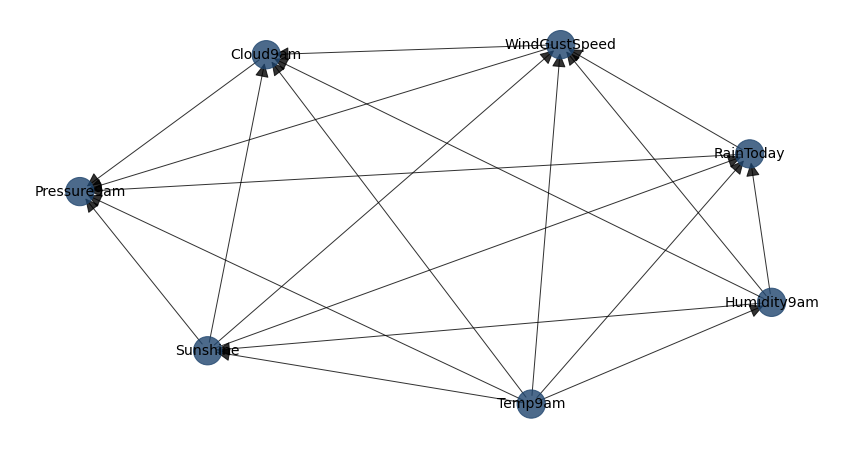

{'pos': {'Humidity9am': array([ 0.8566466 , -0.43285464]),
  'Sunshine': array([-0.65703416, -0.67172422]),
  'RainToday': array([0.79791875, 0.29934778]),
  'Cloud9am': array([-0.49973823,  0.78847486]),
  'WindGustSpeed': array([0.29056728, 0.83806066]),
  'Pressure9am': array([-1.        ,  0.11334452]),
  'Temp9am': array([ 0.21163977, -0.93464896])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f61803fd8e0>,
 'node_properties': {'Humidity9am': {'node_color': '#1f456e',
   'node_size': 800},
  'Sunshine': {'node_color': '#1f456e', 'node_size': 800},
  'RainToday': {'node_color': '#1f456e', 'node_size': 800},
  'Temp9am': {'node_color': '#1f456e', 'node_size': 800},
  'Cloud9am': {'node_color': '#1f456e', 'node_size': 800},
  'Pressure9am': {'node_color': '#1f456e', 'node_size': 800},
  'WindGustSpeed': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Humidity9am', 'Sunshine'): {'color': '#000000',
   'weight': 1},
  ('Humidity9am', 'RainToday'): {'color': '#000

In [61]:
model_update = bn.parameter_learning.fit(model, df_bn)
bn.plot(model_update)

In [62]:
bn.print_CPD(model_update)

CPD of Humidity9am:
+----------------+--------------------+--------------------+
| Temp9am        | Temp9am(0)         | Temp9am(1)         |
+----------------+--------------------+--------------------+
| Humidity9am(0) | 0.3148314606741573 | 0.6236832546313112 |
+----------------+--------------------+--------------------+
| Humidity9am(1) | 0.6851685393258427 | 0.3763167453686887 |
+----------------+--------------------+--------------------+
CPD of Sunshine:
+-------------+---------------------+-----+--------------------+
| Humidity9am | Humidity9am(0)      | ... | Humidity9am(1)     |
+-------------+---------------------+-----+--------------------+
| Temp9am     | Temp9am(0)          | ... | Temp9am(1)         |
+-------------+---------------------+-----+--------------------+
| Sunshine(0) | 0.18722890243232856 | ... | 0.267530203014074  |
+-------------+---------------------+-----+--------------------+
| Sunshine(1) | 0.8127710975676714  | ... | 0.7324697969859261 |
+-------------+-

In [63]:
bn.save(model_update, filepath='bnlearn_model', overwrite=True)

[pypickle] Pickle file saved: [/media/jpozoc/data2tb/ubuntu/Master HMDA/Machine Learning/Assessment 4/bnlearn_model.pkl]


True

In [65]:
q1 = bn.inference.fit(model_update, variables=['Humidity9am'], evidence={'Temp9am':1})

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+---------------+----------+
|    |   Humidity9am |        p |
+====+===============+==========+
|  0 |             0 | 0.623683 |
+----+---------------+----------+
|  1 |             1 | 0.376317 |
+----+---------------+----------+


In [66]:
for cdp in model_update.get('model').get_cpds():
    print(cdp.variable)
    print(cdp.values)
    print(cdp)

Humidity9am
[[0.31483146 0.62368325]
 [0.68516854 0.37631675]]
+----------------+--------------------+--------------------+
| Temp9am        | Temp9am(0)         | Temp9am(1)         |
+----------------+--------------------+--------------------+
| Humidity9am(0) | 0.3148314606741573 | 0.6236832546313112 |
+----------------+--------------------+--------------------+
| Humidity9am(1) | 0.6851685393258427 | 0.3763167453686887 |
+----------------+--------------------+--------------------+
Sunshine
[[[0.1872289  0.10812182]
  [0.29058708 0.2675302 ]]

 [[0.8127711  0.89187818]
  [0.70941292 0.7324698 ]]]
+-------------+---------------------+-----+--------------------+
| Humidity9am | Humidity9am(0)      | ... | Humidity9am(1)     |
+-------------+---------------------+-----+--------------------+
| Temp9am     | Temp9am(0)          | ... | Temp9am(1)         |
+-------------+---------------------+-----+--------------------+
| Sunshine(0) | 0.18722890243232856 | ... | 0.267530203014074  |
+--

In [67]:
df_sampled = bn.sampling(model_update, n=1000000)
df_sampled

[bnlearn] >Forward sampling for 1000000 samples..


  0%|          | 0/7 [00:00<?, ?it/s]

,Humidity9am,Sunshine,RainToday,Cloud9am,WindGustSpeed,Pressure9am,Temp9am
0,1,1,0,1,1,1,0
1,1,0,0,1,0,1,1
2,1,1,0,1,1,1,0
3,0,1,0,1,1,1,0
4,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...
999995,0,1,1,1,1,1,1
999996,0,0,0,1,1,1,1
999997,0,1,0,1,1,0,1
999998,0,1,0,1,0,1,0


In [68]:
model_update_approximate = bn.parameter_learning.fit(model, df_sampled)
bn.print_CPD(model_update_approximate)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of Humidity9am:
+----------------+-------------------+---------------------+
| Temp9am        | Temp9am(0)        | Temp9am(1)          |
+----------------+-------------------+---------------------+
| Humidity9am(0) | 0.316008685792208 | 0.6233501788826251  |
+----------------+-------------------+---------------------+
| Humidity9am(1) | 0.683991314207792 | 0.37664982111737483 |
+----------------+-------------------+---------------------+
[bnlearn] >CPD of Sunshine:
+-------------+---------------------+-----+---------------------+
| Humidity9am | Humidity9am(0)      | ... | Humidity9am(1)      |
+-------------+---------------------+-----+---------------------+
| Temp9am     | Temp9am(0)          | ... | Temp9am(1)          |
+-------------+---------------------+-----+---------------------+
| Sunshine(0) | 0.18943089430894308 | ... | 0.26878459558512463 |
+-

In [69]:
for cdp in model_update_approximate.get('model').get_cpds():
    print(cdp.variable)
    print(cdp.values)

Humidity9am
[[0.31600869 0.62335018]
 [0.68399131 0.37664982]]
Sunshine
[[[0.18943089 0.108026  ]
  [0.29085629 0.2687846 ]]

 [[0.81056911 0.891974  ]
  [0.70914371 0.7312154 ]]]
RainToday
[[[[0.74964922 0.85756096]
   [0.85016106 0.91893241]]

  [[0.55167511 0.46536499]
   [0.71206334 0.66519388]]]


 [[[0.25035078 0.14243904]
   [0.14983894 0.08106759]]

  [[0.44832489 0.53463501]
   [0.28793666 0.33480612]]]]
Cloud9am
[[[[[0.04352076 0.01245491 0.02454001]
    [0.02968368 0.00725965 0.01242279]]

   [[0.01228443 0.00559632 0.01405605]
    [0.0044298  0.00156918 0.0064    ]]]


  [[[0.00689143 0.00451372 0.01079577]
    [0.01528619 0.00583197 0.01304729]]

   [[0.00502243 0.01609128 0.08466174]
    [0.00455896 0.00145063 0.00707371]]]]



 [[[[0.95647924 0.98754509 0.97545999]
    [0.97031632 0.99274035 0.98757721]]

   [[0.98771557 0.99440368 0.98594395]
    [0.9955702  0.99843082 0.9936    ]]]


  [[[0.99310857 0.99548628 0.98920423]
    [0.98471381 0.99416803 0.98695271]]

   [[0

In [70]:
df_bn.head()

,Humidity9am,Sunshine,RainToday,Temp9am,Cloud9am,Pressure9am,WindGustSpeed
0,1,1,0,1,1,0,1
1,0,1,0,1,1,0,1
2,0,1,0,1,1,0,1
3,0,1,0,1,1,1,0
4,1,1,0,1,1,0,1


In [71]:

#q1 = bn.inference.fit(DAG, variables=['RainTomorrow'], evidence={'WindGustSpeed':1, 'Humidity9am':0, 
                                                                'Humidity3pm':1, 'RainToday': 0,
                                                                     'Temp9am': 1, 'Temp3pm':1})

IndentationError: unexpected indent (1879058834.py, line 2)